<a href="https://colab.research.google.com/github/preetamjumech/LLM/blob/main/Transformers_can_do_anything2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Setup
transformers_version = "v4.29.0" #@param ["main", "v4.29.0"] {allow-input: true}

print(f"Setting up everything with transformers version {transformers_version}")

!pip install huggingface_hub>=0.14.1 git+https://github.com/huggingface/transformers@$transformers_version -q diffusers accelerate datasets torch soundfile sentencepiece opencv-python openai

import IPython
import soundfile as sf

def play_audio(audio):
    sf.write("speech_converted.wav", audio.numpy(), samplerate=16000)
    return IPython.display.Audio("speech_converted.wav")

from huggingface_hub import notebook_login
notebook_login()

Setting up everything with transformers version v4.29.0


In [ ]:
import transformers
print(transformers.__version__)

4.29.0


In [ ]:
!pip install transformers[agents]
from transformers import HfAgent
agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Using the agent

The agent is initialized! We now have access to the full power of the tools it has access to.

Let's use it 😎

==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image.


==Code generated by the agent==
image = image_generator(prompt="a boat in the water")


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/text-to-image:
- text_to_image.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/25 [00:00<?, ?it/s]

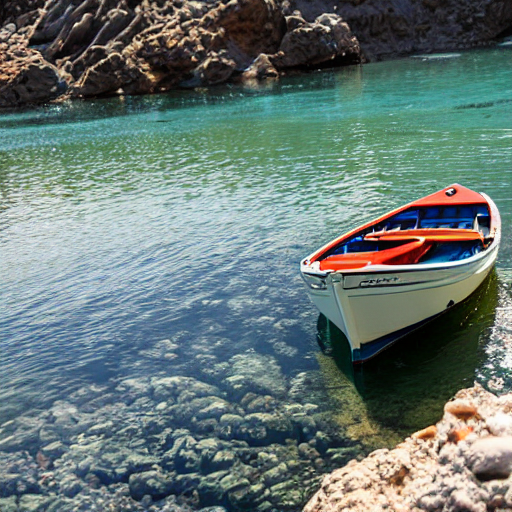

In [ ]:
boat = agent.run("Generate an image of a boat in the water")
boat

In [ ]:
caption = agent.run("Can you caption the `boat_image`?", boat_image=boat)
caption

==Explanation from the agent==
I will use the following  tool: `image_captioner` to generate a caption for the image.


==Code generated by the agent==
caption = image_captioner(boat_image)


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a small boat is anchored in the water'

In [ ]:
audio = agent.run("Read out loud the summary of http://hf.co")
play_audio(audio)

==Explanation from the agent==
I will use the following  tools: `text_reader` to read the summary out loud, then `summarizer` to create the summary.


==Code generated by the agent==
summary = text_downloader("http://hf.co")
print(f"Summary: {summary}")
audio_summary = text_reader(summary)


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/text-download:
- text_download.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Summary: 


















Hugging Face – The AI community building the future.




Hugging Face







					Models

					Datasets

					Spaces

					Docs




			Solutions
		

Pricing
				






Log In
				
Sign Up 


new
HuggingChat
		
Making the community's best AI chat models available to everyone.
		
Start chatting


The AI community building the future.
			
Build, train and deploy state of the art models powered by the reference open source in machine learning.
			

		Star
	

99,960

More than 5,000 organizations are using Hugging Face
			

Allen Institute for AI
non-profit
•
				154 models
				

Meta AI
company
•
				673 models
				

Amazon Web Services
company
•
				1 model
				

Google AI
company
•
				587 models
				

Intel
company
•
				112 models
				

SpeechBrain
non-profit
•
				69 models
				

Microsoft
company
•
				250 models
				

Grammarly
company
•
				5 models
				



Hub
Home of Machine Learning

Create, discover and collaborate on ML better.Join the community to 

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset cmu-arctic-xvectors downloaded and prepared to /root/.cache/huggingface/datasets/Matthijs___cmu-arctic-xvectors/default/0.0.1/a62fea1f9415e240301ea0042ffad2a3aadf4d1caa7f9a8d9512d631723e781f. Subsequent calls will reuse this data.


==Explanation from the agent==
I will use the tool `image_generator` to generate an image of a capybara.


==Code generated by the agent==
image = image_generator(prompt="A capybara")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

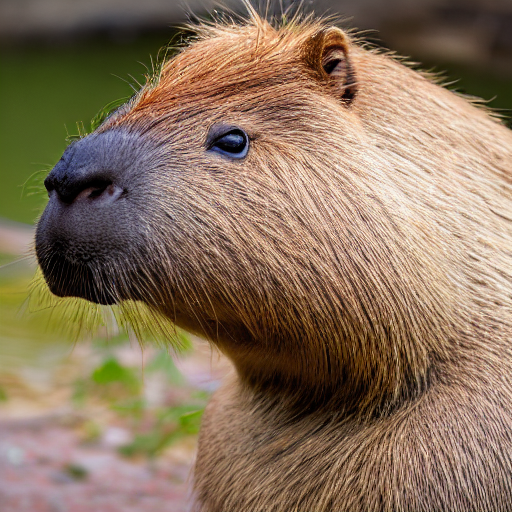

In [ ]:
agent.chat("Generate an image of a capybara")

==Explanation from the agent==
I will use the tool `image_transformer` to transform the image so that it snows.


==Code generated by the agent==
snowy_image = image_transformer(image, prompt="snowy")


==Result==


A new version of the following files was downloaded from https://huggingface.co/space/huggingface-tools/image-transformation:
- image_transformation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

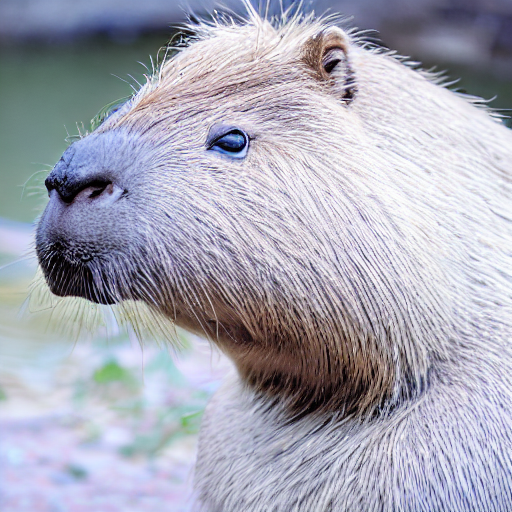

In [ ]:
agent.chat("Transform the image so that it snows")

==Explanation from the agent==
I will use the tool `image_segmenter` to create a mask of the snowy capybaras.


==Code generated by the agent==
mask = image_segmenter(image=snowy_image, label="capybara")


==Result==


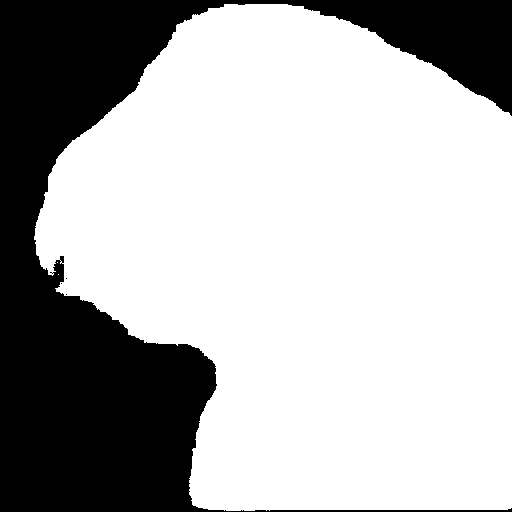

In [ ]:
agent.chat("Show me a mask of the snowy capybaras")

Having access to the past history is great to repeatedly iterate on a given prompt. However, it has its limitations and sometimes you'd like to have a clean history. In order to do so, you can use the following method:

In [ ]:
agent.prepare_for_new_chat()

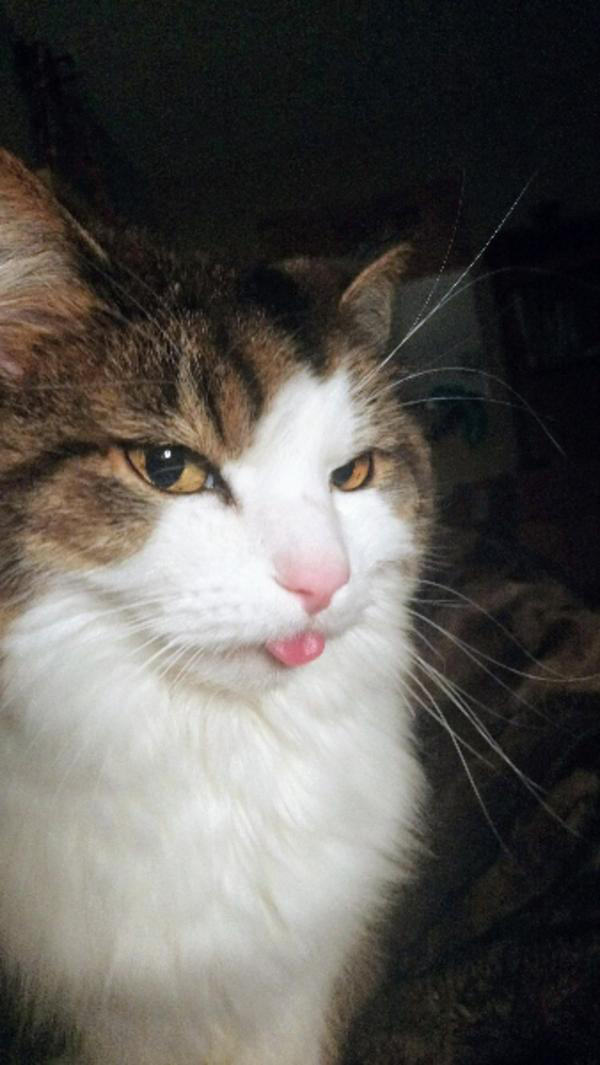

In [ ]:
import requests
from PIL import Image

image = Image.open(requests.get('https://cataas.com/cat', stream=True).raw)
image

In [ ]:
from transformers import Tool

class CatImageFetcher(Tool):
    pass

In [ ]:
from transformers import Tool
from huggingface_hub import list_models


class CatImageFetcher(Tool):
    name = "cat_fetcher"
    description = ("This is a tool that fetches an actual image of a cat online. It takes no input, and returns the image of a cat.")

    inputs = []
    outputs = ["text"]

    def __call__(self):
        return Image.open(requests.get('https://cataas.com/cat', stream=True).raw).resize((256, 256))

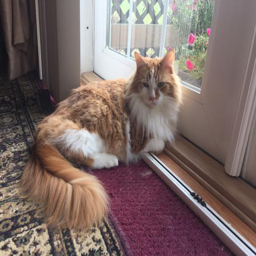

In [ ]:
tool = CatImageFetcher()
tool()

In [ ]:
from transformers.tools import HfAgent

agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder", additional_tools=[tool])

In [ ]:
agent.run("Fetch an image of a cat online and caption it for me")

==Explanation from the agent==
I will use the following  tools: `cat_fetcher` to fetch an image of a cat, then `image_captioner` to caption it.


==Code generated by the agent==
cat = cat_fetcher()
caption = image_captioner(cat)


==Result==


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1346: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a cat sitting in a red bowl on a counter'